## My projects: 

Create a simply classifier to identy a Tesla car out of cars with three kinds of brands using Fastai

# Step 1: Download data using duckduckgo search 

In [70]:
from duckduckgo_search import DDGS
from fastcore.all import *

def search_images(keywords, max_images = 200):
    return L(DDGS().images(keywords, max_results = max_images)).itemgot('image')

Download three images to identify 

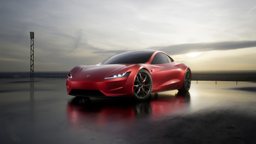

In [71]:
from fastdownload import download_url
from fastai.vision.all import *
dest = 'Tesla_car.jpg'
download_url(search_images('Tesla car photo')[0], dest, show_progress= False)
Image.open(dest).to_thumb(256, 256)

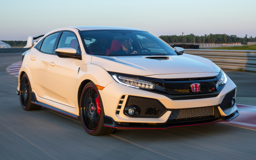

In [72]:
dest = 'Honda_car.jpg'
download_url(search_images('Honda car photo')[0], dest, show_progress= False)
Image.open(dest).to_thumb(256, 256)

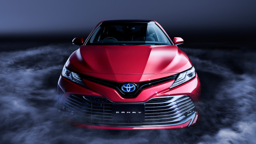

In [73]:
dest = 'Toyota_car.jpg'
download_url(search_images('Toyota car photo')[0], dest, show_progress= False)
Image.open(dest).to_thumb(256, 256)

Step 2 : Download image data to train 

In [74]:
# download data 
groups = 'Tesla', 'Honda', 'Toyota'
path = Path('cars')
for o in groups:
    dir = path/o
    dir.mkdir(exist_ok = True, parents = True)
    download_images(dir, urls = search_images(f"{o} car photo"))
    resize_images(dir, max_size = 400, dest = dir)

/opt/homebrew/anaconda3/lib/python3.12/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Step 3 : Train the model 

In [75]:
# clean data 
# Remove some photoes that can not be opened 
failed = verify_images(get_image_files(path))
print(f"the number of damage files: {len(failed)}")
failed.map(Path.unlink)
print(f"the number of damage files after deleted: {len(failed)}")

the number of damage files: 35
the number of damage files after deleted: 35


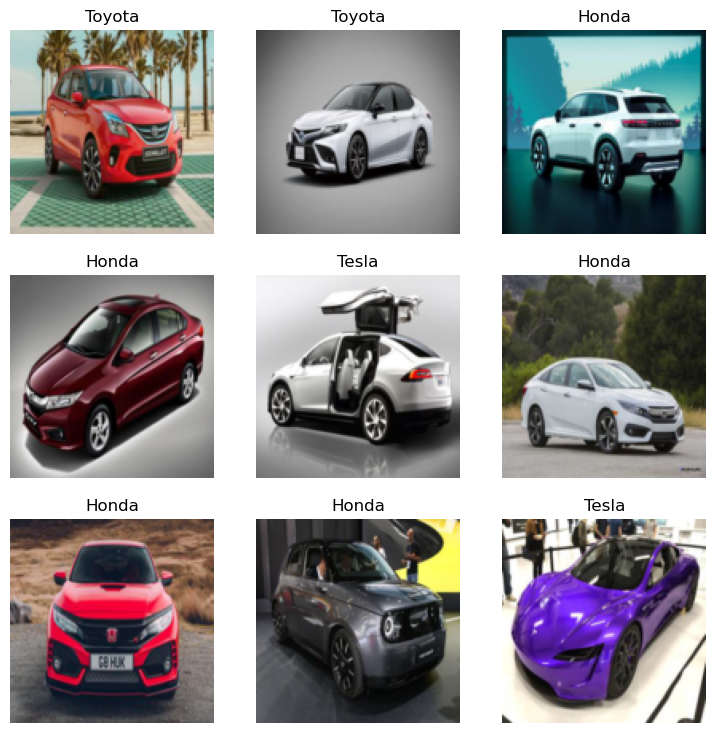

In [76]:
# Train our model 
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(128, method='squish')]
).dataloaders(path, bs = 32)

dls.show_batch(max_n=9)

We use computer vision model `resnet18`. `fastai` comes with a helpful `fine_tune()` method which automatically uses best practices for fine tuning a pre-trained model, so we'll use that.

In [77]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.574239,0.717326,0.247573,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.666032,0.582053,0.169903,00:04
1,0.403037,0.492592,0.145631,00:04
2,0.244297,0.459206,0.140777,00:04


Step 4: make a prediction

In [78]:
# Determine the order of classes
dls.vocab

['Honda', 'Tesla', 'Toyota']

In [80]:
is_Tesla,_,probs = learn.predict(PILImage.create('Honda_car.jpg'))
print(f"This is a: {is_Tesla}.")
print(f"Probability it's a {is_Tesla}: {probs[0]:.4f}")

This is a: Honda.
Probability it's a Honda: 0.9905
